# AKI MOFAcell

In [6]:
data_dir = "/home/dbdimitrov/Repos/liana2_manuscript/data/kidney_injury/"

In [7]:
# columns of interest
sample_key = "ident"
groupby = "cell_type"
condition_key = "Group"

### Setup Env

In [8]:
import numpy as np
import pandas as pd

import scanpy as sc

In [9]:
import mofax as mofa
import muon as mu
import mudata
import decoupler as dc

In [23]:
import liana as li
import plotnine as p9
li.__version__

'0.1.9'

In [14]:
adata = sc.read_h5ad(data_dir + "aki_processed.h5ad")

## Run MOFA

In [15]:
mdata = li.multi.adata_to_views(adata,
                                groupby=groupby,
                                sample_key=sample_key,
                                obs_keys=[condition_key],
                                min_prop=0.05, # min cell prop nnz values (filter features)
                                min_smpls=3, # min samples per view (filter features)
                                min_cells=25, # min cells per view (filter samples)
                                min_counts=100, # min counts per view (filter samples)
                                mode='sum', # mode of aggregation
                                verbose=True,
                                layer='counts'
                                )


100%|██████████| 18/18 [00:25<00:00,  1.41s/it]


In [16]:
mdata

MuData object with n_obs × n_vars = 24 × 101672
  obs:	'Group'
  18 modalities
    CTAL:	24 x 5511
      layers:	'psbulk_props'
    PT:	24 x 6201
      layers:	'psbulk_props'
    EC:	24 x 4479
      layers:	'psbulk_props'
    DCT:	24 x 5725
      layers:	'psbulk_props'
    MTAL:	24 x 5500
      layers:	'psbulk_props'
    ICA:	24 x 6551
      layers:	'psbulk_props'
    Fib:	24 x 5959
      layers:	'psbulk_props'
    DCT-CNT:	18 x 6337
      layers:	'psbulk_props'
    MO:	23 x 5398
      layers:	'psbulk_props'
    PC:	24 x 5793
      layers:	'psbulk_props'
    ICB:	22 x 6992
      layers:	'psbulk_props'
    DTL-ATL:	23 x 6073
      layers:	'psbulk_props'
    Per:	5 x 2270
      layers:	'psbulk_props'
    PEC:	8 x 5638
      layers:	'psbulk_props'
    CNT:	24 x 6023
      layers:	'psbulk_props'
    Pod:	15 x 6094
      layers:	'psbulk_props'
    Tcell:	9 x 3115
      layers:	'psbulk_props'
    Uro:	20 x 8013
      layers:	'psbulk_props'

In [17]:
views = dict()
for view in mdata.mod.keys():
    # dc.plot_filter_by_expr(mdata.mod[view], min_count=10, min_total_count=200)
    keep_genes = dc.filter_by_expr(mdata.mod[view], group=None, min_count=5, min_total_count=20, min_prop=0.1, large_n=0)
    mdata.mod[view] = mdata.mod[view][:, keep_genes].copy()
    
    sc.pp.normalize_total(mdata.mod[view], target_sum=1e4)
    sc.pp.log1p(mdata.mod[view])
    sc.pp.highly_variable_genes(mdata.mod[view])
    
    views[view] = mdata.mod[view]

In [18]:
obs = mdata.obs
# rebuild with re-filtered features
mdata = mudata.MuData(views)
mdata.obs = obs

In [19]:
mdata

MuData object with n_obs × n_vars = 24 × 91093
  obs:	'Group'
  var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
  18 modalities
    CTAL:	24 x 5511
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    PT:	24 x 6201
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    EC:	24 x 4479
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    DCT:	24 x 5725
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    MTAL:	24 x 5500
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    ICA:	24 x 6328
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    Fib:	24 x 5959
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    DCT-CNT:	18 x 5964
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    MO:	23 x 5210
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    PC:	24 x 5793
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    ICB:	22 x 6647
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    DTL-ATL:	23 x 6073
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    Per:	5 x 988
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    PEC:	8 x 3326
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    CNT:	24 x 6023
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    Pod:	15 x 3337
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    Tcell:	9 x 1804
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'
    Uro:	20 x 6225
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'psbulk_props'

In [20]:
mu.tl.mofa(mdata,
           use_obs='union',
           convergence_mode='medium',
           n_factors=5,
           outfile='models/mofacell.h5ad',
           use_var='highly_variable'
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='CTAL' group='group1' with N=24 samples and D=1386 features...
Loaded view='PT' group='group1' with N=24 samples and D=1537 features...
Loaded view='EC' group='group1' with N=24 samples and D=1152 features...
Loaded view='DCT' group='group1' with N=24 samples and D=1428 features...
Loaded view='MTAL' group='group1' with N=24 samples and D=1406 features...
Loaded view

In [21]:
# obtain factor scores
factor_scores = li.multi.get_factor_scores(mdata, obsm_key='X_mofa')
factor_scores.head()

,ident,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Group
0,IRI12h1b1,0.821267,-0.094196,-0.150675,0.037851,-0.015987,12hours
1,IRI12h1b2,0.811562,-0.035932,-0.139970,0.058585,-0.015721,12hours
2,IRI12h2,0.786404,-0.077459,-0.147200,0.029725,-0.014386,12hours
3,IRI12h3,0.797746,-0.059443,-0.143645,0.049769,-0.013308,12hours
4,IRI14d1b1,-0.369062,-0.120921,0.009139,-0.002079,0.071772,14days


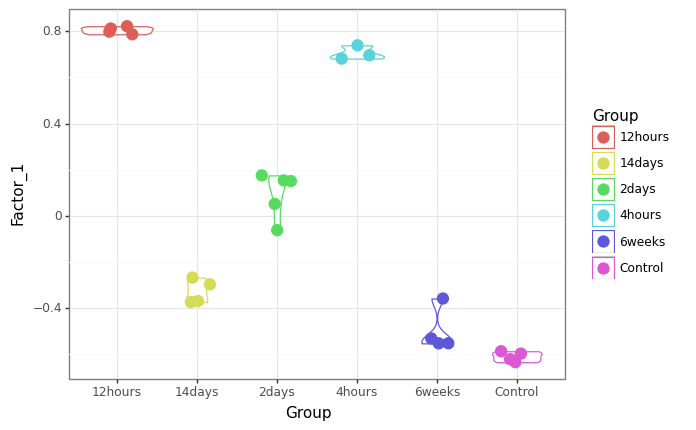

<ggplot: (8775596803751)>

In [24]:
(p9.ggplot(factor_scores) +
 p9.aes(x=condition_key, colour=condition_key, y='Factor_1') +
 p9.geom_violin() +
 p9.geom_jitter(size=4, width=0.2) +
 p9.theme_bw()
 )

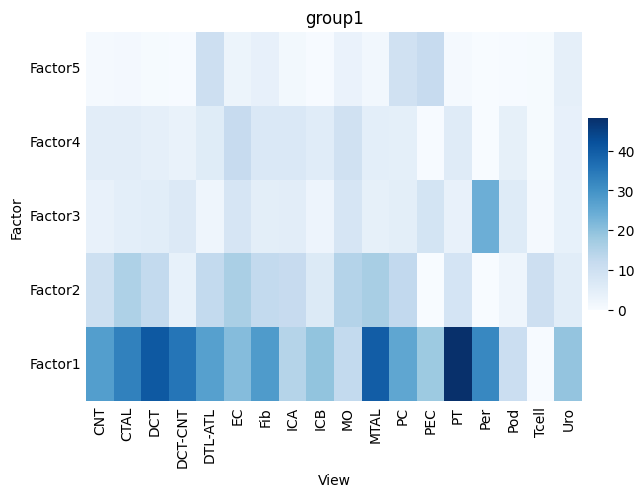

In [25]:
model = mofa.mofa_model("models/mofacell.h5ad")
model
mofa.plot_r2(model, x='View')

In [26]:
factor1_loadings =  li.multi.get_variable_loadings(mdata, 0, view_separator=':') # get loadings for factor 1
factor1_loadings.head()

,loadings,view,variable
10457,-2.150282,PT,Slc7a13
17630,-2.102517,DCT,Egf
18811,-2.009091,DCT,Klhl3
10356,-1.881984,PT,Slc22a30
17127,1.857280,DCT,Chd9


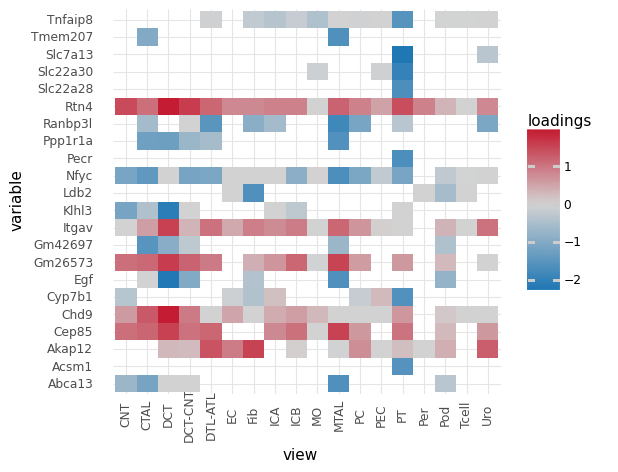

<ggplot: (8775597523740)>

In [27]:
# get 25 genes with highest loadings across all views
top_genes = factor1_loadings['variable'].head(25)
top_loadings = factor1_loadings[factor1_loadings['variable'].isin(top_genes)]
# ^ Note that the genes with the lowest loadings are equally interesting

# plot them
# dotplot of variable, view, loadings
(p9.ggplot(top_loadings) +
 p9.aes(x='view', y='variable', fill='loadings') +
 p9.geom_tile() +
 p9.scale_fill_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') +
 p9.theme_minimal() +
 p9.theme(axis_text_x=p9.element_text(angle=90, hjust=0.5, vjust=0.5), figure_size=(5, 5))
 )